In [1]:
import ast

a = 'seq3_tracking_all_GOOD.txt'

frame_info = {}
with open(a, 'r') as f:
    for line in f:
        frame, _, _, gps, _, _, id = line.strip().split('\t')

        gps = ast.literal_eval(gps)
        
        if frame not in frame_info:
            frame_info[frame] = {}

        frame_info[frame][id] = gps[::-1]

In [35]:
import ast
import numpy as np

a = 'S03Track/c010/tracking_DeepSort.txt'

b = 'S03Track/c010/calibration.txt'

with open(b, 'r') as f:
    lines = f.readlines()
    H = np.array([[float(val) for val in lines[0].strip().replace(';', ' ').split(' ')]])
    H = H.reshape((3, 3)).astype(np.float32)
    H_inv = np.linalg.inv(H)

frame_info = {}
with open(a, 'r') as f:
    for line in f:
        frame, id, x, y, w, h, _, _, _, _ = line.strip().split(',')

        frame = int(frame)
        id = int(id)
        x = float(x)
        y = float(y)
        w = float(w)
        h = float(h)

        gps = np.array([x + w/2, y + h/2, 1]).T
        gps = H_inv@gps
        gps = gps / gps[2]
        
        if frame not in frame_info:
            frame_info[frame] = {}

        frame_info[frame][id] = gps[:2]

In [2]:
import cv2
import os

def create_video(image_folder, video_path, fps=30):
    images = []
    # Load images from folder
    for filename in sorted(os.listdir(image_folder)):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            images.append(cv2.imread(os.path.join(image_folder, filename)))

    # Get dimensions of the first image
    height, width, layers = images[0].shape

    # Initialize video writer
    video_writer = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    # Write images to video
    for image in images:
        video_writer.write(image)

    # Release video writer
    video_writer.release()

from moviepy.editor import VideoFileClip

def convert_to_gif(input_file, output_file, fps=10, target_width=None):
    # Load the video clip
    clip = VideoFileClip(input_file)
    
    # If target width is specified, resize the clip while preserving aspect ratio
    if target_width:
        clip = clip.resize(width=target_width)
    
    # Set the target FPS
    clip = clip.set_fps(fps)
    
    # Write the clip to a GIF file
    clip.write_gif(output_file, fps=fps, loop=0)

In [3]:
min_x = 42.49722222
max_x = 42.49972222
min_y = -90.67666667
max_y = -90.67133333

center = [(min_x + max_x) / 2, (min_y + max_y) / 2]

print(center)

[42.49847222, -90.674]


In [4]:
mapa = cv2.imread('mapa.png')
print(mapa.shape)

(473, 855, 3)


MoviePy - Building file output.gif with imageio.


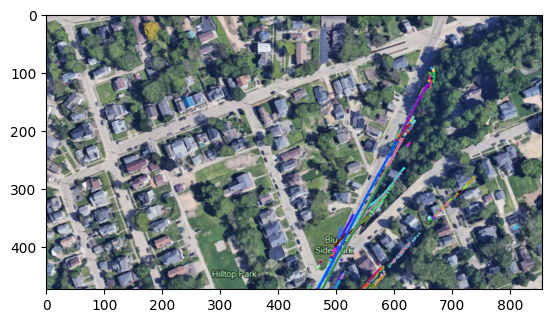

In [5]:
import matplotlib.pyplot as plt
import cv2
import random
import os
import shutil

color_id = {}

if os.path.exists('framesTrackingFrame'):
    shutil.rmtree('framesTrackingFrame')

os.makedirs('framesTrackingFrame')

mapa = cv2.imread('mapa.png')

for frame_id in frame_info:

    for id in frame_info[frame_id]:

        x_lat = frame_info[frame_id][id][0] - min_x
        y_lon = frame_info[frame_id][id][1] - min_y

        x_lat = x_lat / (max_x - min_x)
        y_lon = y_lon / (max_y - min_y)

        h, w, _ = mapa.shape
        
        x_lat = x_lat * h
        y_lon = y_lon * w

        x_lat = h - x_lat
        # y_lon = w - y_lon

        if id not in color_id:
            color_id[id] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

        color_actual = color_id[id]
        
        cv2.circle(mapa, (int(y_lon), int(x_lat)), 2, color_actual, -1)

    cv2.imwrite('framesTrackingFrame/' + str(frame_id).zfill(5) + '.png', mapa)

plt.imshow(mapa[:, :, ::-1])

image_folder = 'framesTrackingFrame'
video_path = 'output.mp4'
create_video(image_folder, video_path, fps=10)

# Replace 'input.mp4' and 'output.gif' with your input and output file paths
input_file = video_path
output_file = 'output.gif'

# Specify desired parameters
fps = 2
target_width = 280  # Adjust this value as needed, or set to None to keep original width

# Convert MP4 to GIF
convert_to_gif(input_file, output_file, fps=fps, target_width=target_width)

In [2]:
# del 10 al 15
from refinedTracking2MOT import refined2MOT
refined2MOT('c010reid_tracking_GOOD.txt', 'c010reid_tracking_GOOD_mot.txt')
refined2MOT('c011reid_tracking_GOOD.txt', 'c011reid_tracking_GOOD_mot.txt')
refined2MOT('c012reid_tracking_GOOD.txt', 'c012reid_tracking_GOOD_mot.txt')
refined2MOT('c013reid_tracking_GOOD.txt', 'c013reid_tracking_GOOD_mot.txt')
refined2MOT('c014reid_tracking_GOOD.txt', 'c014reid_tracking_GOOD_mot.txt')
refined2MOT('c015reid_tracking_GOOD.txt', 'c015reid_tracking_GOOD_mot.txt')

lista_de_ficheros_good = [
    'c010reid_tracking_GOOD_mot.txt',
    'c011reid_tracking_GOOD_mot.txt',
    'c012reid_tracking_GOOD_mot.txt',
    'c013reid_tracking_GOOD_mot.txt',
    'c014reid_tracking_GOOD_mot.txt',
    'c015reid_tracking_GOOD_mot.txt'
]

lista_de_ficheros = [
    'S03Track/c010/tracking_DeepSort.txt',
    'S03Track/c011/tracking_DeepSort.txt',
    'S03Track/c012/tracking_DeepSort.txt',
    'S03Track/c013/tracking_DeepSort.txt',
    'S03Track/c014/tracking_DeepSort.txt',
    'S03Track/c015/tracking_DeepSort.txt'
]

videos = [
    '../AIchallenge/train/S03/c010/vdo.avi',
    '../AIchallenge/train/S03/c011/vdo.avi',
    '../AIchallenge/train/S03/c012/vdo.avi',
    '../AIchallenge/train/S03/c013/vdo.avi',
    '../AIchallenge/train/S03/c014/vdo.avi',
    '../AIchallenge/train/S03/c015/vdo.avi'
]

In [9]:
import os
from refinedTracking2MOT import refined2MOT

cuenta = 10
for fichero, video in zip(lista_de_ficheros_good, videos):
    os.system(
        f'python3 plot_bb_trail.py {fichero} {video} gifs/{cuenta}_post.mp4'
    )

    cuenta += 1

cuenta = 10
for fichero, video in zip(lista_de_ficheros, videos):
    

    os.system(
        f'python3 plot_bb_trail.py {fichero} {video} gifs/{cuenta}og.mp4'
    )

    cuenta += 1